In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

![WhatsApp Image 2025-01-15 at 00.28.34_11d036ee.jpg](<attachment:WhatsApp Image 2025-01-15 at 00.28.34_11d036ee.jpg>)
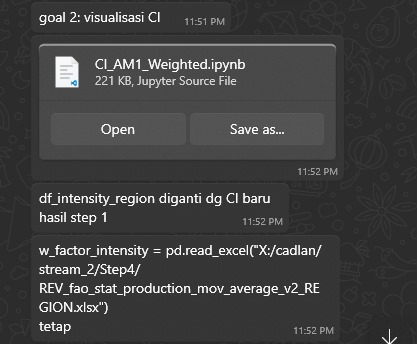

In [207]:
# ini emisi total
df_intensity_region = pd.read_csv("X:/cadlan/stream_2/Step6/CI_emisi_total_FAO_AM1_now.csv")
w_factor_intensity = pd.read_excel("X:/cadlan/stream_2/Step4/REV_fao_stat_production_mov_average_v2_REGION.xlsx")

In [208]:
#ini grand total
# df_intensity_region = pd.read_excel("Z:/achaidir/IMAGE PBL/maps/validasi/CI_grand_total_FAO.xlsx")
# w_factor_intensity = pd.read_excel("Z:/achaidir/IMAGE PBL/maps/validasi/REV_fao_stat_production_mov_average_v2_REGION.xlsx")

In [209]:
df1b = df_intensity_region.copy()
df3 = w_factor_intensity.copy()

In [210]:
df1b

,IMAGE Region Name,time,NGFBFC,Carbon Intensity
0,Brazil,1975,maize,5.129079
1,Brazil,1975,palm oil,1.266595
2,Brazil,1975,"non food, luxury, spices",12.786483
3,Brazil,1975,temperate cereals,19.822184
4,Brazil,1975,plant based fibres,18.806573
...,...,...,...,...
3885,W. Europe,2020,tropical cereals,0.155162
3886,W. Europe,2020,tropical oil crops,0.000000
3887,W. Europe,2020,tropical roots & tubers,0.000000
3888,W. Europe,2020,vegetables & fruits,0.017710


In [211]:
sorted_filtered_df = df1b[
    (df1b['NGFBFC'] == "tropical oil crops") & 
    (df1b['IMAGE Region Name'] == "Russia")
].sort_values(by='Carbon Intensity', ascending=True)
sorted_filtered_df.head(50)

,IMAGE Region Name,time,NGFBFC,Carbon Intensity
2757,Russia,1995,tropical oil crops,0.087838
2771,Russia,2000,tropical oil crops,0.139708
2743,Russia,1990,tropical oil crops,0.158136
2715,Russia,1980,tropical oil crops,0.181217
2729,Russia,1985,tropical oil crops,0.216686
2785,Russia,2005,tropical oil crops,0.465365
2799,Russia,2010,tropical oil crops,0.572990
2827,Russia,2020,tropical oil crops,2.768473
2813,Russia,2015,tropical oil crops,12.513987
2701,Russia,1975,tropical oil crops,56.788378


In [212]:
sorted_filtered_df = df3[
    (df3['NGFBFC'] == "Tropical oil crops") & 
    (df3['IMAGE Region Name'] == "Russia")
].sort_values(by='FAO Production', ascending=True)
sorted_filtered_df.head(50)

,IMAGE Region Name,time,NGFBFC,FAO Production
3096,Russia,2015,Tropical oil crops,28.730
3110,Russia,2020,Tropical oil crops,120.640
3082,Russia,2010,Tropical oil crops,398.000
3068,Russia,2005,Tropical oil crops,578.712
3054,Russia,2000,Tropical oil crops,2000.000
3040,Russia,1995,Tropical oil crops,2612.000
3026,Russia,1990,Tropical oil crops,40541.000
2998,Russia,1980,Tropical oil crops,55824.200
2984,Russia,1975,Tropical oil crops,67213.000
3012,Russia,1985,Tropical oil crops,68898.000


In [213]:
df1b_copy = df1b.copy()
df1b_copy.loc[df1b_copy['Carbon Intensity'] > 50, 'Carbon Intensity'] = 0
df1b_copy

,IMAGE Region Name,time,NGFBFC,Carbon Intensity
0,Brazil,1975,maize,5.129079
1,Brazil,1975,palm oil,1.266595
2,Brazil,1975,"non food, luxury, spices",12.786483
3,Brazil,1975,temperate cereals,19.822184
4,Brazil,1975,plant based fibres,18.806573
...,...,...,...,...
3885,W. Europe,2020,tropical cereals,0.155162
3886,W. Europe,2020,tropical oil crops,0.000000
3887,W. Europe,2020,tropical roots & tubers,0.000000
3888,W. Europe,2020,vegetables & fruits,0.017710


In [214]:
df3_copy = df3.copy()
df3_copy['NGFBFC'] = df3_copy['NGFBFC'].str.lower()
df3_copy['NGFBFC'] = df3_copy['NGFBFC'].str.replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df3_copy = df3_copy[~((df3_copy['time'] <= 1990) & (df3_copy['IMAGE Region Name'] == "Russia"))]
df3_copy = df3_copy[df3_copy['time'] >= 1975]
df3_copy

,IMAGE Region Name,time,NGFBFC,FAO Production
16,Brazil,1975,maize,1.676013e+07
17,Brazil,1975,palm oil,4.040000e+04
18,Brazil,1975,"non food, luxury, spices",1.753227e+06
19,Brazil,1975,temperate cereals,1.268408e+05
20,Brazil,1975,plant based fibres,2.253283e+06
...,...,...,...,...
4274,W. Europe,2020,tropical cereals,7.002724e+05
4275,W. Europe,2020,tropical oil crops,0.000000e+00
4276,W. Europe,2020,tropical roots & tubers,0.000000e+00
4277,W. Europe,2020,vegetables & fruits,9.706803e+07


In [215]:
data1 = np.zeros((16, 26), dtype='float32')
average_AreaHarvested_RegionCrops = np.zeros((16, 26), dtype='float32')
result_average = np.zeros((16), dtype='float32')

for i, ngfbfc in enumerate(df1b_copy['NGFBFC'].unique()):
    for n, image_region in enumerate(df3_copy['IMAGE Region Name'].unique()):
        ngfbfc_areaharves = df3_copy[(df3_copy['IMAGE Region Name'] == image_region) & (df3_copy['NGFBFC'] == ngfbfc) & (df3_copy['FAO Production'] > 0)]['FAO Production'].replace([np.inf, -np.inf], np.nan).mean()
        average_AreaHarvested_RegionCrops[i][n] = np.nan_to_num(ngfbfc_areaharves)

In [216]:
for i, ngfbfc in enumerate(df1b_copy['NGFBFC'].unique()):
    carbon_footprint = df1b_copy[df1b_copy['NGFBFC'] == ngfbfc]['Carbon Intensity'].replace([np.inf, -np.inf], np.nan).mean()
    data1[i] = np.nan_to_num(carbon_footprint)

In [217]:
for x in range(0, 16):
    result_average[x] = np.average(data1[x], weights=average_AreaHarvested_RegionCrops[x]) #nilai rata rata juga tidak hanya 2020
    
result_average

array([0.8865689 , 0.8147142 , 2.94444   , 1.7975309 , 2.0532398 ,
       2.3724942 , 0.92102975, 2.5311916 , 0.13534655, 0.83433425,
       0.6421013 , 2.6899168 , 3.7790995 , 0.36361057, 0.23593512,
       1.2272933 ], dtype=float32)

In [218]:
df_avg = pd.DataFrame(result_average, index=df3_copy['NGFBFC'].unique())
df_avg = df_avg.reset_index()
df_avg = df_avg.rename(columns={"index":'NGFBFC', 0:"value"})
df_avg = df_avg.sort_values(by=['value'], ascending=[False])
df_avg

,NGFBFC,value
12,tropical oil crops,3.779099
2,"non food, luxury, spices",2.944440
11,tropical cereals,2.689917
7,soybeans,2.531192
5,pulses,2.372494
4,plant based fibres,2.053240
3,temperate cereals,1.797531
15,wheat,1.227293
6,rice,0.921030
0,maize,0.886569


In [219]:
df1b[((df1b['time'] >= 1990) & (df1b['IMAGE Region Name'] == "Russia"))]

,IMAGE Region Name,time,NGFBFC,Carbon Intensity
2732,Russia,1990,maize,0.062537
2733,Russia,1990,"non food, luxury, spices",0.380406
2734,Russia,1990,temperate cereals,0.331176
2735,Russia,1990,plant based fibres,0.240757
2736,Russia,1990,pulses,0.020635
...,...,...,...,...
2825,Russia,2020,temperate roots & tubers,0.012094
2826,Russia,2020,tropical cereals,0.603837
2827,Russia,2020,tropical oil crops,2.768473
2828,Russia,2020,vegetables & fruits,0.008226


In [220]:
df_avg['NGFBFC'] = df_avg['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')

df_footprint_region = df1b.replace([np.inf, -np.inf], np.nan).fillna(0)
df_footprint_region = df_footprint_region[~((df_footprint_region['time'] <= 1990) & (df_footprint_region['IMAGE Region Name'] == "Russia"))] #hapus data rusia sebelum 1990 karena USSR
df_footprint_region['NGFBFC'] = df_footprint_region['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')

df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
df_footprint_region_index = df_footprint_region_table.stack(level=0)
df_footprint_region_index = df_footprint_region_index.reset_index()
df_footprint_region_index = df_footprint_region_index.drop(columns=['level_2'])
df_footprint_region_index.index = df_footprint_region_index['NGFBFC'].values

produk_diulang = np.array([item for item in df_avg['NGFBFC'].to_list() for _ in range(1)])
df_footprint_region_index = df_footprint_region_index.loc[produk_diulang]
df_footprint_region_index = df_footprint_region_index.drop(columns=['time'])
df_footprint_region_index


IMAGE Region Name,NGFBFC,Brazil,Canada,Central America,Central Asia,Central Europe,China region,Eastern Africa,India,Indonesia region,...,Rest of South Asia,Rest of Southern Africa,Russia region,South Africa,Southeast Asia,Turkey,USA,Ukraine region,Western Africa,Western Europe
tropical oil crops,tropical oil crops,13.083002,NaN,7.679494,0.000000,0.817253,0.520486,59.385430,0.338449,0.091471,...,6.514594,2.949107,NaN,9.520813,3.884117,13.422680,239.397283,0.000000,0.177425,0.689854
tropical oil crops,tropical oil crops,6.040549,NaN,5.397206,0.000000,0.443362,11.385195,2.688081,0.207455,0.102442,...,3.633560,4.201565,NaN,162.204408,5.168278,0.048198,0.000000,0.000000,0.108563,1.034594
tropical oil crops,tropical oil crops,4.067696,NaN,6.339722,0.000000,2.411603,29.851672,60.337983,0.243091,12.388655,...,0.217353,1.719652,NaN,37.087938,5.110668,0.787208,0.000000,0.000000,4.179303,1.346165
tropical oil crops,tropical oil crops,4.325773,NaN,3.340633,3.096408,1.525068,5.856892,0.416546,0.347883,3.357715,...,2.765388,1.373259,NaN,26.368607,2.840839,0.062346,0.000000,0.000000,2.781786,0.630604
tropical oil crops,tropical oil crops,5.963883,NaN,4.197563,0.434884,8.044844,6.794543,16.860176,0.230215,3.115263,...,3.401966,1.581097,0.087838,38.717385,0.304573,0.052690,0.000000,0.000000,13.227361,0.106623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sugar crops,sugar crops,0.055001,0.030896,0.016841,0.042683,0.008434,0.044463,0.026573,0.035219,2.262644,...,0.044122,0.025774,0.006144,0.216225,2.024305,0.040458,0.034908,0.004465,0.010736,0.026791
sugar crops,sugar crops,0.022799,0.034505,0.018399,0.022282,0.010000,0.043615,0.083597,0.038382,0.932630,...,0.045829,0.032654,0.015515,0.025266,0.229753,0.007382,0.028565,0.002685,0.032518,0.016179
sugar crops,sugar crops,0.036760,0.022858,0.013375,0.184517,0.002880,0.047643,0.102635,0.042155,0.111597,...,0.048118,0.088015,0.022379,0.059829,0.092888,0.007344,0.022227,0.001376,0.008587,0.006933
sugar crops,sugar crops,0.057277,0.032436,0.017713,0.112352,0.015184,0.046362,0.009759,0.042645,0.015267,...,0.044842,0.087002,0.020634,0.024678,0.165487,0.020256,0.020532,0.000713,0.006184,0.006116


In [221]:
average1_melt = df_footprint_region_index.melt(id_vars=['NGFBFC'], value_name='value') 
average1_melt['value'] = average1_melt['value'].fillna(0)
average1_melt

,NGFBFC,IMAGE Region Name,value
0,tropical oil crops,Brazil,13.083002
1,tropical oil crops,Brazil,6.040549
2,tropical oil crops,Brazil,4.067696
3,tropical oil crops,Brazil,4.325773
4,tropical oil crops,Brazil,5.963883
...,...,...,...
4155,sugar crops,Western Europe,0.026791
4156,sugar crops,Western Europe,0.016179
4157,sugar crops,Western Europe,0.006933
4158,sugar crops,Western Europe,0.006116


In [222]:
average1x = average1_melt[
    (average1_melt['IMAGE Region Name'] == "South Africa") & 
    (average1_melt['NGFBFC'] == "tropical oil crops")
]
average1x

,NGFBFC,IMAGE Region Name,value
3040,tropical oil crops,South Africa,9.520813
3041,tropical oil crops,South Africa,162.204408
3042,tropical oil crops,South Africa,37.087938
3043,tropical oil crops,South Africa,26.368607
3044,tropical oil crops,South Africa,38.717385
3045,tropical oil crops,South Africa,179.049205
3046,tropical oil crops,South Africa,9.265378
3047,tropical oil crops,South Africa,29.151076
3048,tropical oil crops,South Africa,5.770849
3049,tropical oil crops,South Africa,17.123743


In [223]:
def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0

# average1 = average.reset_index()
# average1_melt = df_footprint_region_index.melt(id_vars=['NGFBFC'], value_name='value') 
# average = average1_melt.groupby(['IMAGE Region Name', 'NGFBFC'])['value'].mean().to_frame('Mean')

average = average1_melt.groupby(['IMAGE Region Name', 'NGFBFC'])['value'].apply(custom_mean).to_frame('Mean')
average1 = average.reset_index()
average1

,IMAGE Region Name,NGFBFC,Mean
0,Brazil,maize,2.423389
1,Brazil,"non food, luxury, spices",5.909240
2,Brazil,palm oil,0.785057
3,Brazil,plant based fibres,5.637960
4,Brazil,pulses,7.033003
...,...,...,...
411,Western Europe,tropical cereals,0.276371
412,Western Europe,tropical oil crops,0.754495
413,Western Europe,tropical roots & tubers,0.023592
414,Western Europe,vegetables & fruits,0.025920


In [224]:
average1x = average1[average1['IMAGE Region Name'] == "Brazil"]
average1x

,IMAGE Region Name,NGFBFC,Mean
0,Brazil,maize,2.423389
1,Brazil,"non food, luxury, spices",5.909240
2,Brazil,palm oil,0.785057
3,Brazil,plant based fibres,5.637960
4,Brazil,pulses,7.033003
5,Brazil,rice,1.098318
6,Brazil,soybeans,3.282642
7,Brazil,sugar crops,0.072440
8,Brazil,temperate cereals,7.047621
9,Brazil,temperate oil crops,1.024805


In [225]:
# df_footprint_region_index = df_footprint_region_index.drop(columns=['NGFBFC'])



average1.index = average1['NGFBFC'].values
average1_filtered = average1[average1['Mean'] < 25]

results = {}
average1_new = average1_filtered.sort_values(by=['Mean', 'NGFBFC'], ascending=[True, True])

average1_new = average1_new[~((average1_new['IMAGE Region Name'] == "Canada"))]
average1_new = average1_new[~((average1_new['IMAGE Region Name'] == "Central America"))]
average1_new = average1_new[~((average1_new['IMAGE Region Name'] == "Japan"))]
average1_new = average1_new[~((average1_new['IMAGE Region Name'] == "Central Europe"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "palm oil") & 
                                      (average1_new['IMAGE Region Name'] == "South Africa"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "palm oil") & 
                                      (average1_new['IMAGE Region Name'] == "Rest of Southern Africa"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "palm oil") & 
                                      (average1_new['IMAGE Region Name'] == "USA"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "non food, luxury, spices") & 
                                      (average1_new['IMAGE Region Name'] == "Russia region"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "soybeans") & 
                                      (average1_new['IMAGE Region Name'] == "Southeast Asia"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "soybeans") & 
                                      (average1_new['IMAGE Region Name'] == "Indonesia region"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "plant based fibres") & 
                                      (average1_new['IMAGE Region Name'] == "Ukraine region"))]

for country in average1_new['IMAGE Region Name'].unique():
    for category in average1_new['NGFBFC'].unique():
        filtered_data = average1_new[average1_new['NGFBFC'] == category]
        sorted_data = filtered_data.sort_values(by='Mean', ascending=False)
        top_5_data = sorted_data.head(3)
        results[category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results.values())])

df_footprint_df_filtered = df_footprint_df[df_footprint_df['Mean'] < 25]
df_footprint_df_filtered

,IMAGE Region Name,NGFBFC,Mean
palm oil,Indonesia region,palm oil,2.092029
palm oil,Brazil,palm oil,0.785057
palm oil,Southeast Asia,palm oil,0.710246
sugar crops,Indonesia region,sugar crops,1.418976
sugar crops,Southeast Asia,sugar crops,0.381536
sugar crops,Western Europe,sugar crops,0.138966
temperate cereals,Brazil,temperate cereals,7.047621
temperate cereals,Western Africa,temperate cereals,2.448875
temperate cereals,Eastern Africa,temperate cereals,1.926720
temperate oil crops,Eastern Africa,temperate oil crops,3.734932


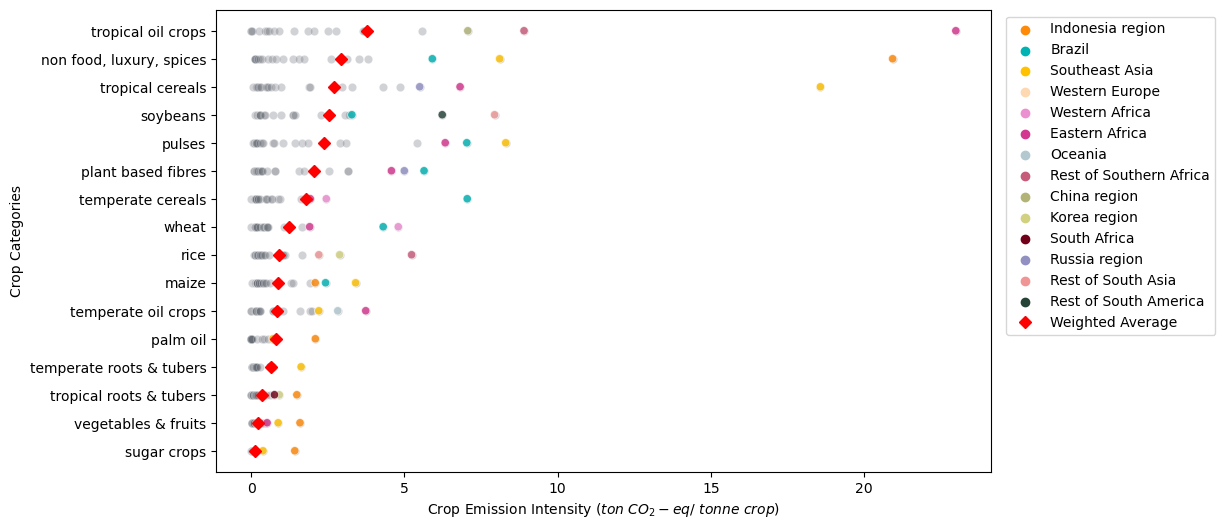

In [226]:
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots(figsize=(10, 6))

palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3','Rest of Southern Africa':'#C75B7A','South Africa':'#710019','Eastern Africa':'#D43790',
                'Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0', 'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176',
                'Western Europe':'#FED8B1', 'Rest of South America':'#254336','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285',
                'USA':'#40A2E3','Canada':'#BBE2EC'}

ax.set_xlabel('Crop Emission Intensity ($ton~CO_2-eq/~tonne~crop$)')
ax.set_ylabel('Crop Categories')
sns.scatterplot(x="Mean", y="NGFBFC", color='#686D76',
                sizes=(100, 300), alpha=.3, data=average1_new.loc[produk_diulang])

sns.scatterplot(x="Mean", y="NGFBFC", hue='IMAGE Region Name',
                sizes=(100, 300), alpha=.8, palette=palettes, data=df_footprint_df_filtered)
ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')

# categories = average1_filtered.loc[produk_diulang]['NGFBFC'].unique()

# # Mapping kategori ke indeks
# category_indices = np.arange(len(categories))
# category_to_index = {category: index for index, category in enumerate(categories)}

# # Mengonversi kategori ke indeks
# y_indices = np.array([category_to_index[category] for category in categories])

# # Interpolasi spline untuk membuat garis lebih halus
# xnew = np.linspace(y_indices.min(), y_indices.max(), 300)
# spl = make_interp_spline(y_indices, df_avg['value'].to_numpy(), k=2)
# y_smooth = spl(xnew)

# # Plotting garis yang diinterpolasi
# ax.plot(y_smooth, xnew, linestyle='-', color='red', label='Line')
ax.plot(df_avg['value'].to_numpy(), df_avg['NGFBFC'].to_numpy(), "D", color='red', label='Weighted Average')

legend_handles, legend_labels = ax.get_legend_handles_labels()

# Find the index of the "Weighted Average" legend handle
weighted_average_index = legend_labels.index('Weighted Average')

# Remove the "Weighted Average" legend handle from its current position
weighted_average_handle = legend_handles.pop(weighted_average_index)
weighted_average_label = legend_labels.pop(weighted_average_index)

# Add the "Weighted Average" legend handle to the end of the list
legend_handles.append(weighted_average_handle)
legend_labels.append(weighted_average_label)

# Update the legend with the reordered handles and labels
ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')

plt.show()

In [227]:
average1_new[average1_new['NGFBFC'] == "plant based fibres"]

,IMAGE Region Name,NGFBFC,Mean
plant based fibres,Turkey,plant based fibres,0.099892
plant based fibres,Northern Africa,plant based fibres,0.105236
plant based fibres,India,plant based fibres,0.165893
plant based fibres,Middle East,plant based fibres,0.195562
plant based fibres,Central Asia,plant based fibres,0.208351
plant based fibres,Western Europe,plant based fibres,0.287137
plant based fibres,Rest of South Asia,plant based fibres,0.328010
plant based fibres,USA,plant based fibres,0.345230
plant based fibres,Mexico,plant based fibres,0.351654
plant based fibres,China region,plant based fibres,0.501874


In [228]:
df_avg

,NGFBFC,value
12,tropical oil crops,3.779099
2,"non food, luxury, spices",2.944440
11,tropical cereals,2.689917
7,soybeans,2.531192
5,pulses,2.372494
4,plant based fibres,2.053240
3,temperate cereals,1.797531
15,wheat,1.227293
6,rice,0.921030
0,maize,0.886569


In [229]:
df_footprint_df_filtered['IMAGE Region Name'].value_counts()

Southeast Asia             9
Eastern Africa             9
Brazil                     8
Indonesia region           6
Western Africa             3
Rest of Southern Africa    2
Korea region               2
Russia region              2
Rest of South Asia         2
Western Europe             1
Oceania                    1
China region               1
South Africa               1
Rest of South America      1
Name: IMAGE Region Name, dtype: int64